# Data understanding

##### Importing required libraries

In [102]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [2]:
# importing libraries to exclude the extra warnings
import warnings
warnings.filterwarnings('ignore')

##### Importing the source data from csv file.

In [3]:
df = pd.read_csv("C:/Users/kvine/Downloads/day.csv")

##### Data quality checks

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### No null columns in loaded data.

In [20]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [19]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preparation

In [6]:
#Converting the numerical categorical columns with categorical lables.
def seasons(x):
    if x==1:
        v='spring'
    elif x==2:
        v='summer'
    elif x==4:
        v='fall'
    else:
        v='winter'
    return(v)
df['season']=df.season.apply(seasons)


In [7]:
df['season'].value_counts()

winter    188
summer    184
spring    180
fall      178
Name: season, dtype: int64

In [51]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,twindspeed
0,1,01-01-2018,spring,0,1,0,1,1,B,14.110847,18.18125,80.5833,10.749882,331,654,985,-0.284301
1,2,02-01-2018,spring,0,1,0,2,1,B,14.902598,17.68695,69.6087,16.652113,131,670,801,0.809299
2,3,03-01-2018,spring,0,1,0,3,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0.806779
3,4,04-01-2018,spring,0,1,0,4,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562,-0.286438
4,5,05-01-2018,spring,0,1,0,5,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0.075447


In [8]:
#weathersit numeric categorical variables are handled by converting into lables
df.loc[(df['weathersit']==1),'weathersit']='A'
df.loc[(df['weathersit']==2),'weathersit']='B'
df.loc[(df['weathersit']==3),'weathersit']='C'
df.loc[(df['weathersit']==4),'weathersit']='D'
# Month categorical variables are handled by changing the month numbers into short form of month names
def mth(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df['mnth']=df[['mnth']].apply(mth)
#converting weekday numbers into week names
df['weekday']=df[['weekday']].apply(lambda x:x.map({1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'}))
df['weekday'].value_counts()

Thur    105
Wed     105
Tue     104
Mon     104
Sun     104
Fri     104
Sat     104
Name: weekday, dtype: int64

In [164]:
df['mnth'].value_counts()

May    62
Oct    62
Dec    62
Jul    62
Mar    62
Jan    62
Aug    62
Jun    60
Nov    60
Apr    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [207]:
df['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

## EDA with visualisations

-0.00461009070834868 0.6763140387852972


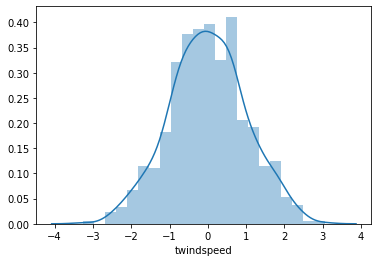

In [9]:
#Data is converted to a clean format that is suitable for analysis
#reduced windspeed skewing and created trnasformed column using fit_transform
pt=PowerTransformer()
df['twindspeed']=pt.fit_transform(df[['windspeed']])
sns.distplot(df['twindspeed'])
# windspeed skewing has came down from 0.067 to 0.004 after using fit transform turned the model into much normaly distributed
print(df['twindspeed'].skew(),df['windspeed'].skew())

In [10]:
# dropping the unwanted columns
df1=df.drop(['instant','dteday'],axis=1)

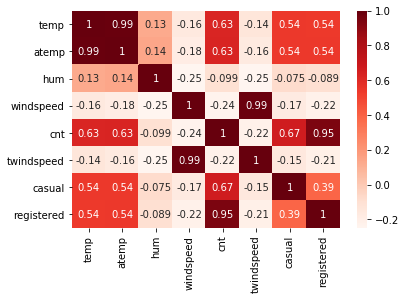

In [11]:
#New metrics derivation using heatmap for identifing the columns to analyse
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt','twindspeed','casual','registered']].corr(),annot=True,cmap='Reds')


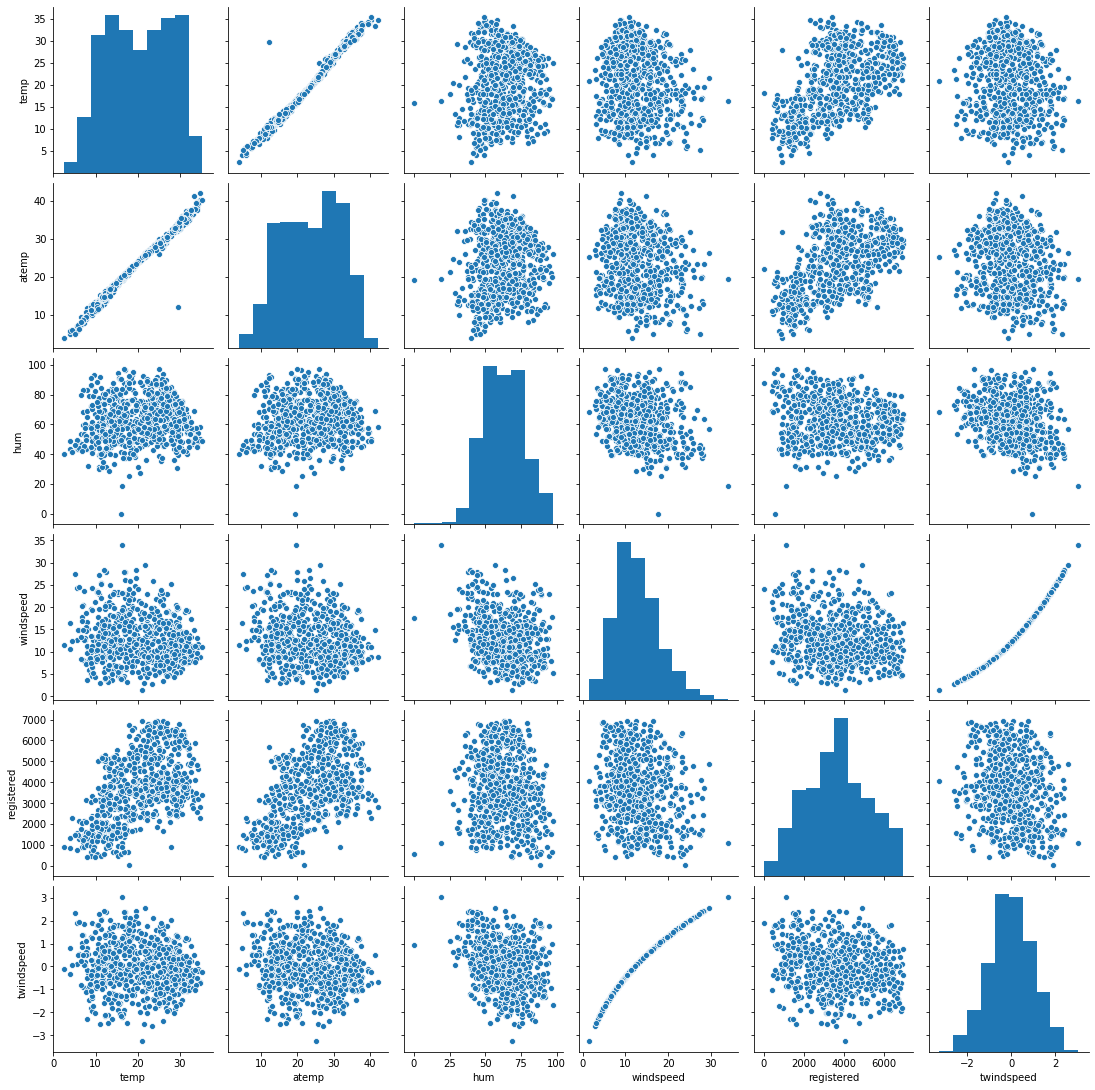

In [14]:
# using pair plot to check correlation between numeric columns to exclude the columns highly corelated 
# from analysis because they highly multicollinear.
df['registered']=df['registered'].astype('float64')
sns.pairplot(df.select_dtypes(include=['float64']))

In [15]:
#from above analysis there is multicollinerity between atemp & temp as it is highly correlated temp based on above heatmap
df1=df1[df1.columns[~df1.columns.isin(['atemp','casual','registered'])]]

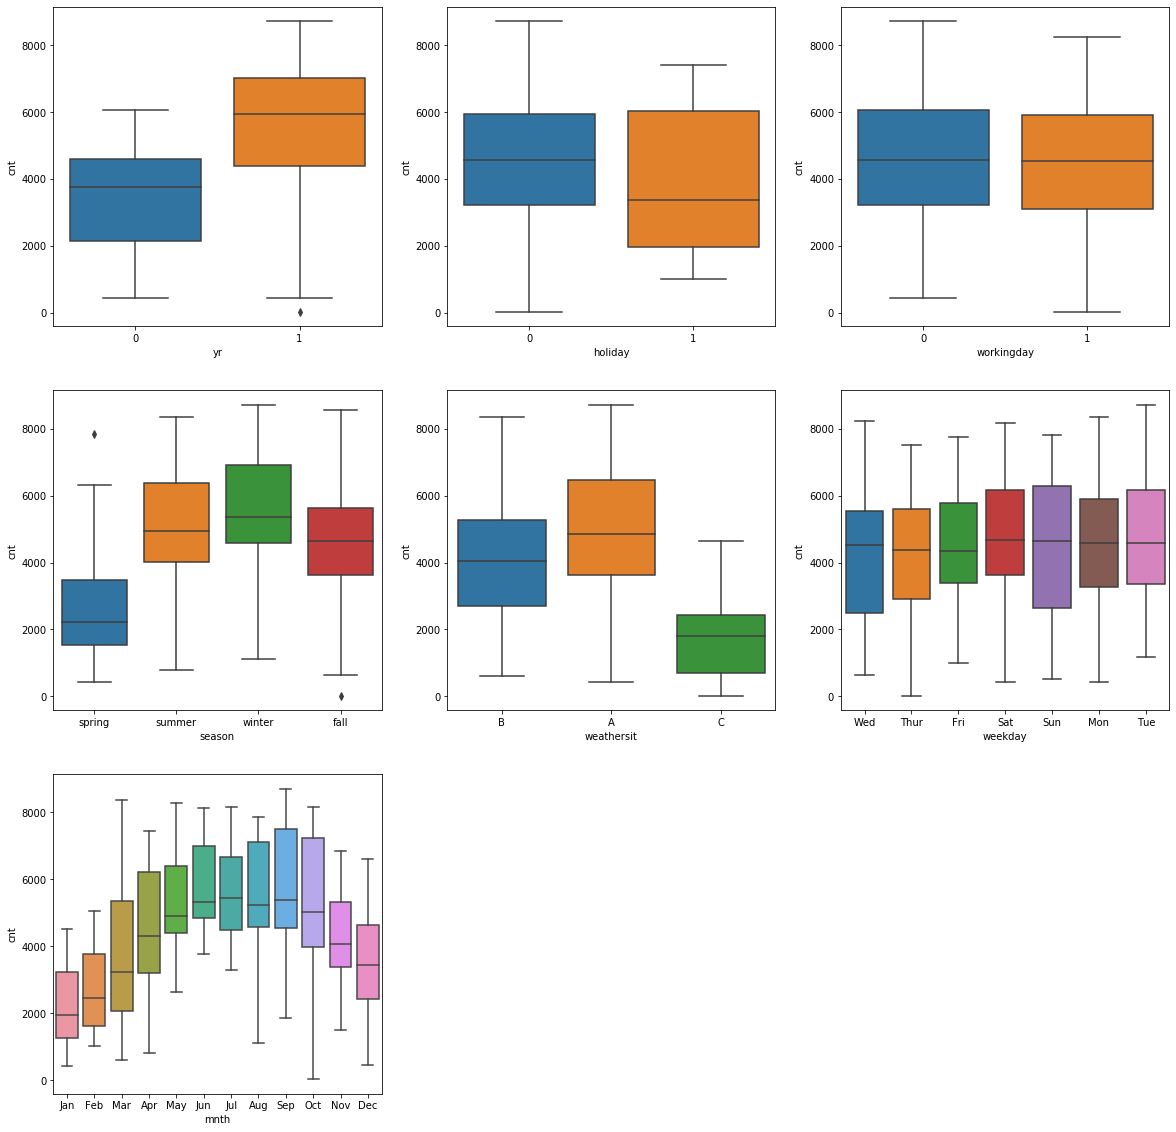

In [209]:
# visualization using boxplot on categorical columns to identify outlier for further analysis 
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot('yr','cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot('holiday','cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot('workingday','cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot('season','cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot('weathersit','cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot('weekday','cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot('mnth','cnt',data=df)
plt.show()

### Dummy variables

#### Creating dummy varible for columns season,mnth,weekday & weatherist having category variables with N levels

In [16]:
df_cat=df1.select_dtypes(include=['object'])

In [17]:
#creating dummy variables
df_dummy=pd.get_dummies(df_cat, drop_first=True)
df_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
#Creating new data frame by merge 2 datasets using dummy variables and orginal data frame 
df3=pd.concat([df1,df_dummy],axis=1)

In [19]:
# droping unwanted columns for which dummy variables are already created  and 'casual'&'registered' (as cnt is derived from 
# those columns) 
df3=df3.drop(['season','mnth','weekday','weathersit'],axis=1)

In [293]:
df3.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,twindspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,985,-0.284301,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0.809299,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0.806779,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,-0.286438,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0.075447,1,0,...,0,0,0,0,1,0,0,0,0,0


## Model building and evaluation

In [174]:
# Spliting the data into train and test sets
np.random.seed(0)
df_train,df_test=train_test_split(df3,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


#### Scaling the numerical variables using min-max scaler

In [135]:
# Scaling is useful to manage extreme data point  like outlier by rescaling and fit the data.
scaler=MinMaxScaler()

In [136]:
# Applying scaler to the numeric variables
var=['temp','hum','windspeed','cnt']
df_train[var]=scaler.fit_transform(df_train[var])

In [137]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,twindspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0.014129,0,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,-0.214044,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,-0.275299,1,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1.812845,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,-0.745078,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.764151,0.337636,0,1,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.832835,-0.755091,0,0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,-1.376068,1,0,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0.312586,0.750062,0,0,...,0,0,0,0,0,0,0,1,1,0


In [138]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,twindspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.010610,0.243137,0.245098,...,0.086275,0.080392,0.129412,0.143137,0.147059,0.152941,0.137255,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,1.010535,0.429398,0.430568,...,0.281045,0.272166,0.335985,0.350557,0.354512,0.360284,0.344454,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.590849,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,-0.665777,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,-0.010714,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.659456,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.046058,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


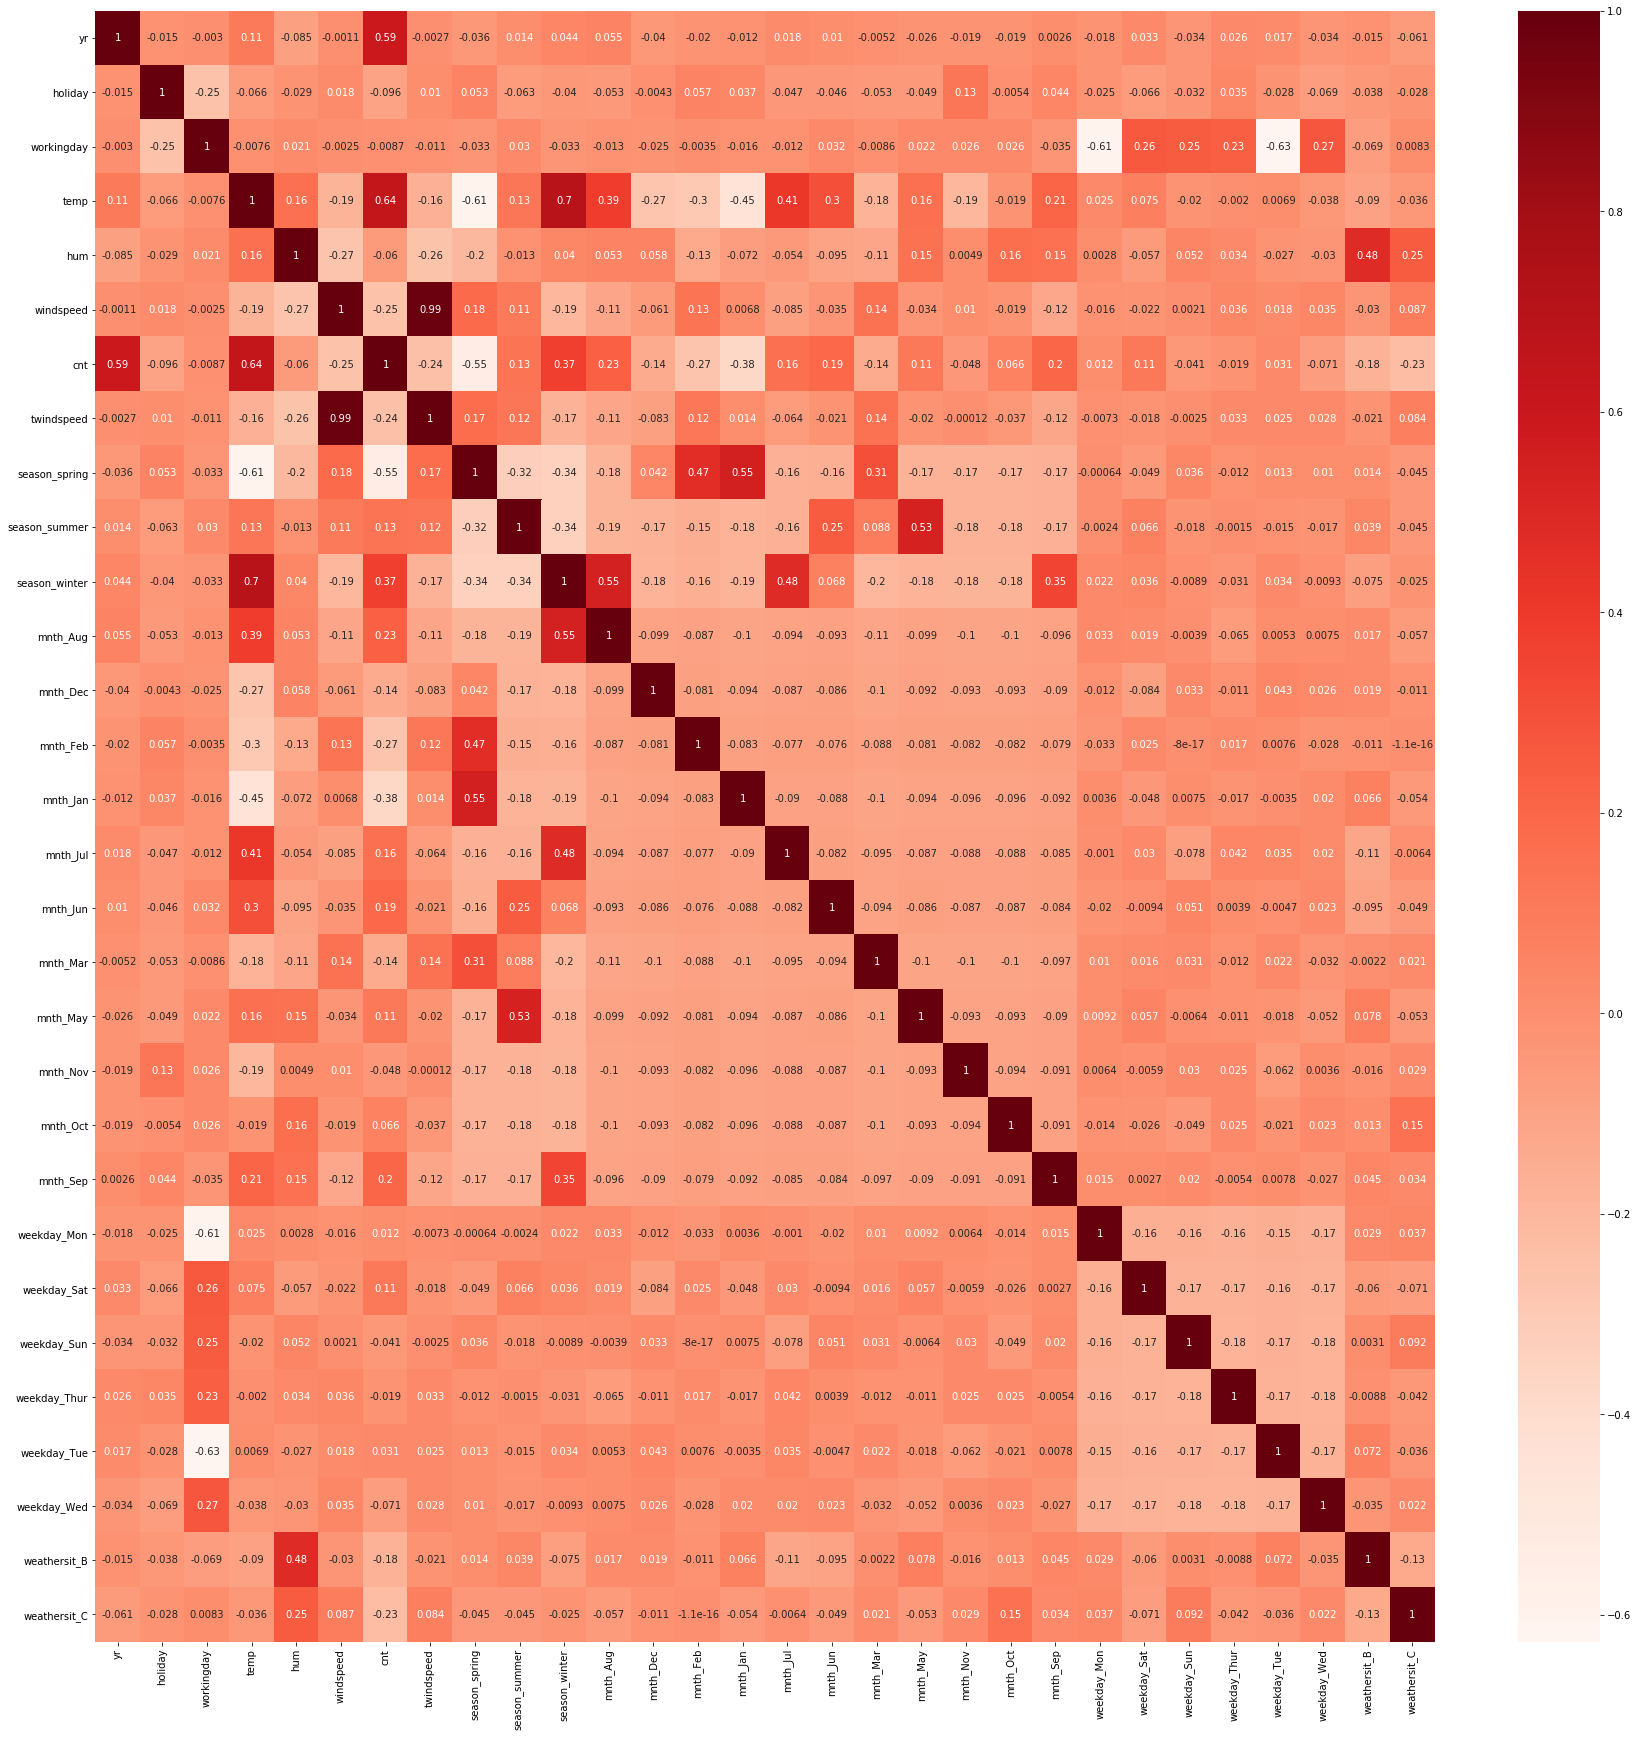

In [139]:
# Ploting heat map to find the columns with significant correlation
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True, cmap='Reds')

##### Temperature is correlated with count. Thus ploting scattered plot between those variables to check the same

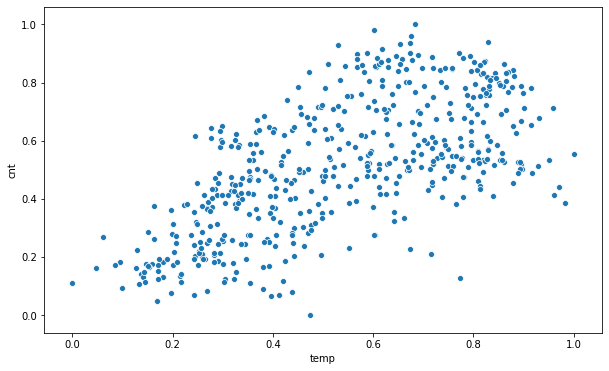

In [140]:
plt.figure(figsize=[10,6])
sns.scatterplot(df_train.temp,df_train.cnt)
plt.show()

In [141]:
# creating target variable y_train and X_train for future analysis
y_train=df_train.pop('cnt')
X_train=df_train.drop(['twindspeed'],axis=1)

In [142]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


###### Building the model with train data

In [143]:
#Building the initial model
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_lm).fit()
lr.params

const            0.494199
yr               0.230857
holiday         -0.135424
workingday      -0.060524
temp             0.445458
hum             -0.157315
windspeed       -0.183046
season_spring   -0.154602
season_summer   -0.068654
season_winter   -0.110897
mnth_Aug         0.021507
mnth_Dec        -0.045669
mnth_Feb        -0.037279
mnth_Jan        -0.063612
mnth_Jul        -0.034910
mnth_Jun         0.000975
mnth_Mar         0.000608
mnth_May         0.024064
mnth_Nov        -0.041555
mnth_Oct         0.005790
mnth_Sep         0.086055
weekday_Mon     -0.045078
weekday_Sat      0.015104
weekday_Sun      0.011241
weekday_Thur    -0.015058
weekday_Tue     -0.038721
weekday_Wed     -0.013392
weathersit_B    -0.059355
weathersit_C    -0.251511
dtype: float64

In [144]:
# Instantiate
lm=LinearRegression()
# Fit a line
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          4.33e-179
Time:                        13:13:45   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4942      0.086      5.779      0.000       0.326       0.662
yr                0.2309      0.008     28.387      0.000       0.215       0.247
holiday          -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday       -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp              0.4455      0.047      9.513      0.000       0.353       0.537
hum              -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed        -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring    -0.1546      0.026     -5.894      0.000      -0.206      -0.103
season_summer    -0.0687      0.030     -2.284      0.023      -0.128      -0.010
season_winter    -0.1109      0.028     -3.938      0.000      -0.166      -0.056
mnth_Aug          0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec         -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb         -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan         -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul         -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun          0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar          0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May          0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov         -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct          0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep          0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Mon      -0.0451      0.071     -0.637      0.524      -0.184       0.094
weekday_Sat       0.0151      0.015      0.980      0.327      -0.015       0.045
weekday_Sun       0.0112      0.015      0.736      0.462      -0.019       0.041
weekday_Thur     -0.0151      0.015     -1.005      0.315      -0.045       0.014
weekday_Tue      -0.0387      0.071     -0.548      0.584      -0.178       0.100
weekday_Wed      -0.0134      0.015     -0.886      0.376      -0.043       0.016
weathersit_B     -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_C     -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4
================================================================

##### In first run R-sqaured  is 0.851 and also close to adjusted R_squared wihich is 0.842

### Model using RFE(Building model using recursion feature elemination)

In [170]:
# Building the 1st model using rfe with 15 fields   
from sklearn.feature_selection import RFE
lm1=LinearRegression()
rfe1=RFE(lm1,15)
rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [171]:
# Evaluation of model using 15 columns
var1=X_train.columns[rfe1.support_]
X_train_rfe1=X_train[var1]
# adding constant
X_train_rfe1=sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [172]:
# Re-fitting the model with 15 variables
lm1=sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        14:27:58   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4237      0.032     13.153

##### After reducing the columns from 28 to 15 columns R-Squared is not changed much. It's 0.851 for 28 columns whereas for 15 columns it's 0.845 and it is also close to adjusted R-squared value which is 0.841. Thus this is a significant model.

In [149]:
#Checking VIF(variance inflation factor) values based on this we can decide which variable to drop from model
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=X_train_rfe1.drop('const',axis=1)

In [150]:
vif=pd.DataFrame()
vif['Features']=v.columns
vif['VIF']=[variance_inflation_factor(v.values,i) for i in range(v.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,24.59
3,hum,23.41
7,season_winter,5.36
4,windspeed,4.44
5,season_spring,3.12
6,season_summer,3.10
13,weathersit_B,2.24
0,yr,2.06
9,mnth_Jan,1.78
11,mnth_Nov,1.65


In [155]:
# Re-building the model with 7 fields   
lm2=LinearRegression()
rfe2=RFE(lm2,6)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=6, step=1, verbose=0)

In [156]:
# Evaluation of model using 7 columns
var2=X_train.columns[rfe2.support_]
X_train_rfe2=X_train[var2]
# adding constant
X_train_rfe2=sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,temp,hum,windspeed,season_spring,weathersit_C
653,1.0,1,0.509887,0.575354,0.300794,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0
426,1.0,1,0.442393,0.640189,0.255342,1,0
728,1.0,1,0.245101,0.498067,0.663106,1,0
482,1.0,1,0.395666,0.504508,0.188475,0,0


In [157]:
# Re-fitting the model with 7 variables
lm2=sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     344.1
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.80e-174
Time:                        13:16:12   Log-Likelihood:                 454.22
No. Observations:                 510   AIC:                            -894.4
Df Residuals:                     503   BIC:                            -864.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4336      0.030     14.228

###### After reducing the columns from 15 to 7 columns R-Squared is not changed so much. It's 0.845 for 28 columns whereas for 7 columns it's 0.810 and it is also close to adjusted R-squared value which is 0.804. Thus this is significant model.

In [158]:
#Checking VIF values for 7 columns
v1=X_train_rfe2.drop('const',axis=1)
vif1=pd.DataFrame()
vif1['Features']=v1.columns
vif1['VIF']=[variance_inflation_factor(v1.values,i) for i in range(v1.shape[1])]
vif1['VIF']=round(vif['VIF'],2)
vif1=vif1.sort_values(by='VIF',ascending=False)
vif1

,Features,VIF
2,hum,24.59
3,windspeed,23.41
4,season_spring,4.44
5,weathersit_C,3.12
0,yr,2.06
1,temp,1.06


#### Residual analysis

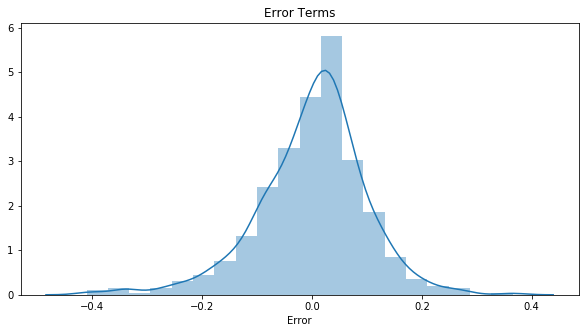

In [159]:
y_train_pred=lm2.predict(X_train_rfe2)
plt.figure(figsize=(10,5))
plt.title('Error Terms')
sns.distplot((y_train-y_train_pred),bins=20)
plt.xlabel('Error')
plt.show()

###### Error terms is normal distribution which is significant model.

### Predictions and evaluation

In [175]:
# Creating test data by transforming
num_var=['temp','hum','windspeed','cnt']
df_test[num_var]=scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,twindspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.692706,-1.630149,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,-1.015306,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0.214357,0,0,...,1,0,1,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0.245613,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,1.265000,0,1,...,0,0,1,0,0,0,0,0,0,0


###### Quality chceks of test data

In [161]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,twindspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,-0.026353,0.255708,0.264840,...,0.082192,0.086758,0.173516,0.141553,0.132420,0.123288,0.155251,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.981198,0.437258,0.442259,...,0.275286,0.282125,0.379560,0.349389,0.339723,0.329520,0.362974,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,-3.255962,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,-0.670636,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.005921,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.598962,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,2.376335,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [162]:
# creating x and y test
y_test=df_test.pop('cnt')
X_test=df_test.drop(['twindspeed'],axis=1)

In [163]:
#adding constants
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,1,...,0,0,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,0,...,1,0,1,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,1,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [164]:
# removing the other columns which are not part of enchanced train model
X_test_rfe2=X_test_sm.drop(['holiday', 'workingday','season_summer', 'season_winter', 'mnth_Aug','mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar','mnth_May', 'mnth_Nov','weekday_Wed', 'weathersit_B','weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue','mnth_Oct', 'weekday_Mon','mnth_Sep'],axis=1)
X_test_rfe2.head()

,const,yr,temp,hum,windspeed,season_spring,weathersit_C
184,1.0,0,0.831783,0.657364,0.084219,0,0
535,1.0,1,0.901354,0.610133,0.153728,0,0
299,1.0,0,0.511964,0.837699,0.334206,0,0
221,1.0,0,0.881625,0.437098,0.339570,0,0
152,1.0,0,0.817246,0.314298,0.537414,0,0


In [165]:
# creating the test predict
y_test_pred=lm2.predict(X_test_rfe2)

In [166]:
X_test_rfe2.shape

(219, 7)

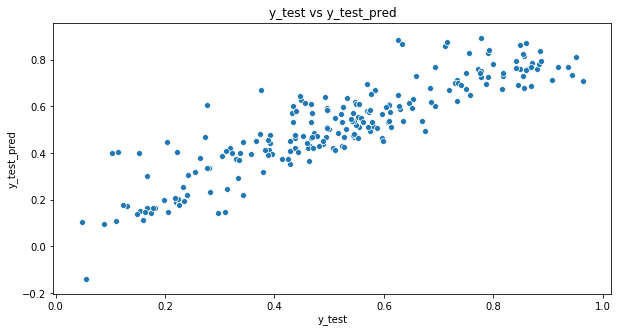

In [167]:
# Analysing y_test and y_predict to check correlation
plt.figure(figsize=(10,5))
plt.title('y_test vs y_test_pred')
sns.scatterplot(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

In [169]:
# r2 score to check significance
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7957015664241162

###### R-squared on training set is 0.804 and r2 score on test set is 0.79 which is pretty close.In conclusion, what model has learned in training set it is able to generalize on the test set.

#### Equation of best fited line is:
#### cnt=0.23*yr+0.39*temp-0.21*hum-0.19*windspeed-0.15*season_spring-0.19*weathersit_C
#### Overall all we have decent model. yr and temp are more significant factors that are driving the model.